# FFT 1D 

$ f(t) = boxcar(t) $

a=1

$ F(w) = sinc( πw) $

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft,ifft,fftshift,ifftshift,fftfreq


def getk(t):
    N=len(t)
    dt=t[1]-t[0]
    k = fftfreq(N,d=dt)
    return fftshift(k)

def igetk(t):
    N=len(t)
    dt=t[1]-t[0]
    k = fftfreq(N,d=dt)
    return ifftshift(k)
# Si  t es impar o par, ifftshift o fftshift no dan lo mismo

In [3]:
a=1
def box(t):
    mask = np.abs(t) < a/2
    y=mask*np.ones(t.shape)
    return y

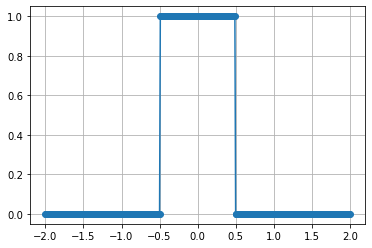

In [4]:
# importantisimo definir un vector impar!!!

t=np.linspace(-2,2,401)
plt.plot(t,box(t),'o-')
plt.grid(True)
plt.show()

In [5]:
t=np.linspace(-4,4,400)
tmin=t[1]-t[0]
tmax=np.abs(t[-1]) + np.abs(t[0])
tmax,tmin

(8.0, 0.020050125313283207)

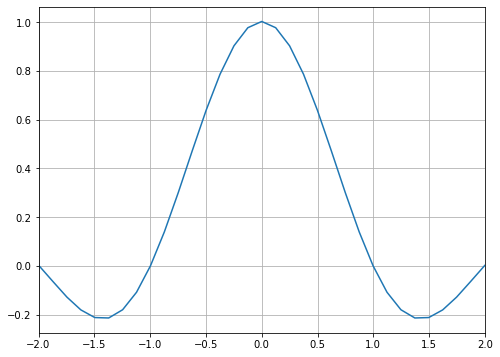

In [8]:
# la fft y la ifft dan lo mismo a menos de un factor de la longuitud de t
# aca comparo ambas, no miro escalas

plt.figure(figsize=[8,6])
plt.plot(getk(t),np.real(fftshift(fft(ifftshift(box(t)))))*tmin )
plt.xlim([-2,2])
plt.grid(True)

In [9]:
wmax=1/(t[1]-t[0])
wmin=1/(np.abs(t[-1])+np.abs(t[0]))
w=np.linspace(wmin/10,wmax*10,1001)

In [10]:
mw=400
w=np.linspace(-mw,mw,1001)
wmax=np.abs(w[-1])+np.abs(w[0])
wmin=w[1]-w[0]
wmax,wmin

(800.0, 0.8000000000000114)

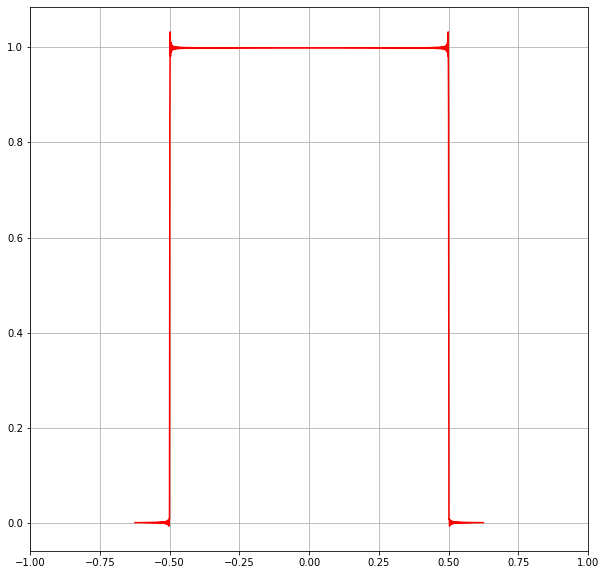

In [11]:
plt.figure(figsize=[10,10])
plt.plot(getk(w),np.real(fftshift(ifft(ifftshift(np.sinc(w))))*wmax),'-r')
plt.xlim(-1,1)
plt.grid(True)

# Conclusion 
---

* Definiendo con np.linspace puedo ir y volver.
* las escalas en $x$ se acomodan solas
* la escala en $y$ son el wmax y el tmin



## Definiendo con `np.arange`

In [12]:
# si len(w) es par fftshift y ifftshift son lo mismo

wmax=200
dw=0.5
wmin=0
w=np.arange(wmin,wmax,dw)
wmax=np.abs(w[-1])+np.abs(w[0])
wmax,wmin,len(w)

(199.5, 0, 400)

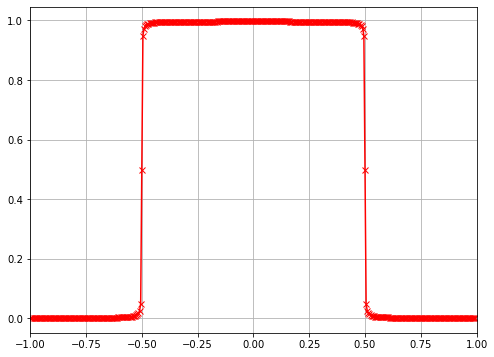

In [13]:
plt.figure(figsize=[8,6])
plt.plot(getk(w),(np.real(fftshift(ifft(np.sinc(w))))-1/(2*len(w)))*2*wmax,'-xr')
plt.xlim(-1,1)
plt.grid(True)

# Conclusion 
---

* Definiendo con np.arange puedo ir y volver.
* las escalas en $x$ se acomodan solas
* la escala en $y$ la acomodo con un offset y una escala